In [13]:
import pandas as pd

# Load the data
df = pd.read_csv("results.csv")

# Convert numeric columns from strings to float (if necessary)
for col in df.columns:
    if col not in ['arch']:
        df[col] = pd.to_numeric(df[col], errors='coerce')


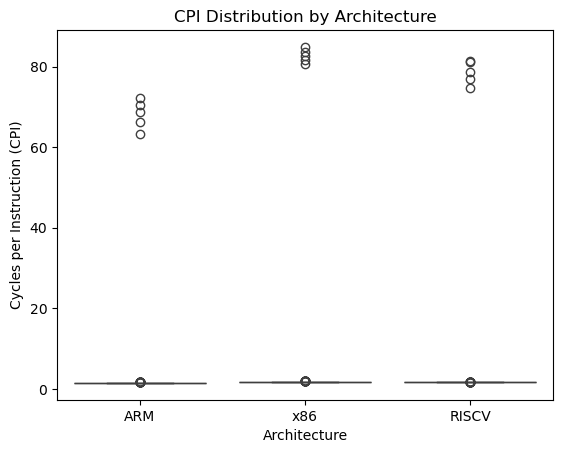

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.boxplot(data=df, x="arch", y="core.cpi")
plt.title("CPI Distribution by Architecture")
plt.ylabel("Cycles per Instruction (CPI)")
plt.xlabel("Architecture")
plt.show()


In [35]:
mpl.rcParams['font.family'] = 'monospace'

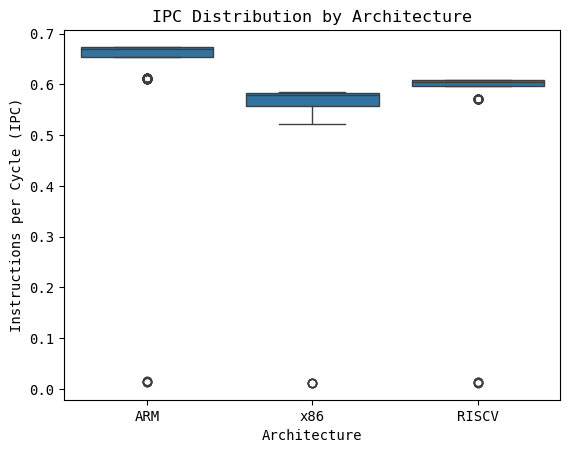

In [37]:
sns.boxplot(data=df, x="arch", y="core.ipc")
plt.title("IPC Distribution by Architecture")
plt.ylabel("Instructions per Cycle (IPC)")
plt.xlabel("Architecture")
plt.show()


Text(0.5, 1.0, 'CPI vs L2 Cache Size')

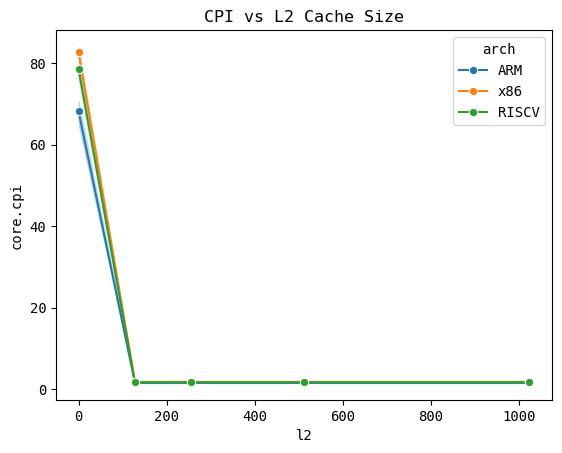

In [38]:
sns.lineplot(data=df, x="l2", y="core.cpi", hue="arch", marker="o")
plt.title("CPI vs L2 Cache Size")


In [39]:
# Remove rows where cache is effectively disabled (e.g., l1d or l1i is 0 or NaN)
cache_enabled_df = df[(df["l1d"] != 0) & (df["l1i"] != 0)]


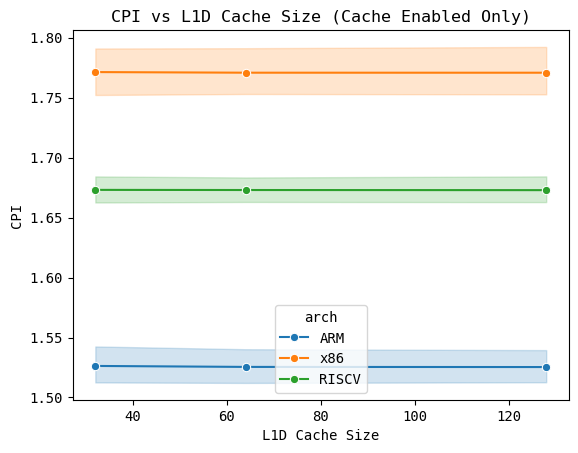

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=cache_enabled_df, x="l1d", y="core.cpi", hue="arch", marker="o")
plt.title("CPI vs L1D Cache Size (Cache Enabled Only)")
plt.xlabel("L1D Cache Size")
plt.ylabel("CPI")
plt.show()


In [52]:
cache_enabled_df

,arch,l1d,l1i,l2,num,dim,simSeconds,simTicks,simInsts,simOps,l1d-cache-0.demandHits::total,l1d-cache-0.demandMisses::total,l1i-cache-0.demandHits::total,l1i-cache-0.demandMisses::total,l2-cache-0.demandHits::total,l2-cache-0.demandMisses::total,core.cpi,core.ipc,l1d_miss_rate
0,ARM,128,64,1024,1000000,20,0.002198,2197972000,1479303,1689401,649878.0,586.0,1478796.0,531.0,819.0,962.0,1.485793,0.673041,0.000901
1,ARM,32,64,1024,1000000,10,0.000619,619080000,404565,462988,154143.0,553.0,404066.0,521.0,794.0,864.0,1.530157,0.653528,0.003575
2,ARM,128,32,256,1000000,80,0.058561,58560726000,39188736,42408450,19240209.0,989.0,39188253.0,545.0,1686.0,1216.0,1.494323,0.669199,0.000051
3,ARM,32,64,1024,1000000,5,0.000282,281722000,172171,192213,50024.0,550.0,171671.0,521.0,750.0,859.0,1.636102,0.611209,0.010875
4,ARM,32,64,256,1000000,40,0.010422,10421619000,7021893,7837955,3299807.0,988.0,7021385.0,540.0,1061.0,1236.0,1.484154,0.673784,0.000299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,x86,128,128,1024,1000000,5,0.000434,433545000,226849,414226,67185.0,272.0,298134.0,678.0,607.0,1004.0,1.910841,0.523330,0.004032
551,x86,32,32,512,1000000,10,0.000879,878761000,490173,881503,171032.0,311.0,637413.0,680.0,664.0,1002.0,1.792559,0.557862,0.001815
552,x86,64,32,128,1000000,40,0.013567,13566832000,7927896,12666523,3301021.0,583.0,10150738.0,689.0,626.0,1344.0,1.711246,0.584370,0.000177
553,x86,32,128,128,1000000,10,0.000879,878725000,490173,881503,171032.0,311.0,637415.0,678.0,662.0,1002.0,1.792486,0.557884,0.001815


/tmp/ipykernel_1869527/3910742981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache_enabled_df["l1d_miss_rate"] = (
/tmp/ipykernel_1869527/3910742981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache_enabled_df["l1i_miss_rate"] = (
/tmp/ipykernel_1869527/3910742981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

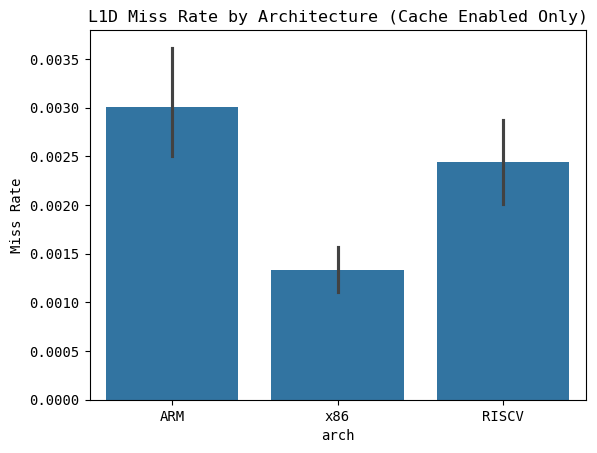

In [53]:
cache_enabled_df["l1d_miss_rate"] = (
    cache_enabled_df["l1d-cache-0.demandMisses::total"] /
    (cache_enabled_df["l1d-cache-0.demandHits::total"] + cache_enabled_df["l1d-cache-0.demandMisses::total"])
)

cache_enabled_df["l1i_miss_rate"] = (
    cache_enabled_df["l1i-cache-0.demandMisses::total"] /
    (cache_enabled_df["l1i-cache-0.demandHits::total"] + cache_enabled_df["l1i-cache-0.demandMisses::total"])
)

cache_enabled_df["l2_miss_rate"] = (
    cache_enabled_df["l2-cache-0.demandMisses::total"] /
    (cache_enabled_df["l2-cache-0.demandHits::total"] + cache_enabled_df["l2-cache-0.demandMisses::total"])
)


sns.barplot(data=cache_enabled_df, x="arch", y="l1d_miss_rate")
plt.title("L1D Miss Rate by Architecture (Cache Enabled Only)")
plt.ylabel("Miss Rate")
plt.show()


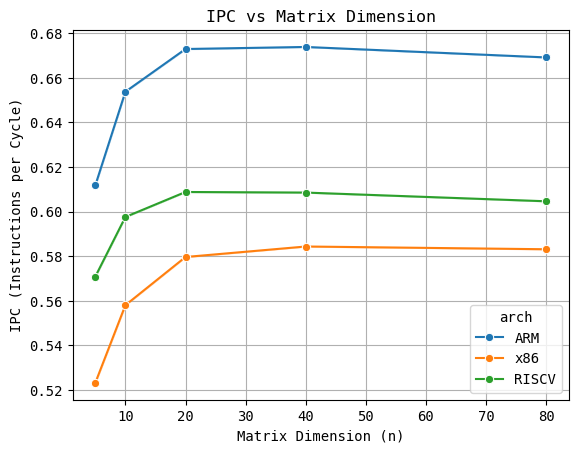

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=cache_enabled_df, x="dim", y="core.ipc", hue="arch", marker="o")
plt.title("IPC vs Matrix Dimension")
plt.xlabel("Matrix Dimension (n)")
plt.ylabel("IPC (Instructions per Cycle)")
plt.grid(True)
plt.show()


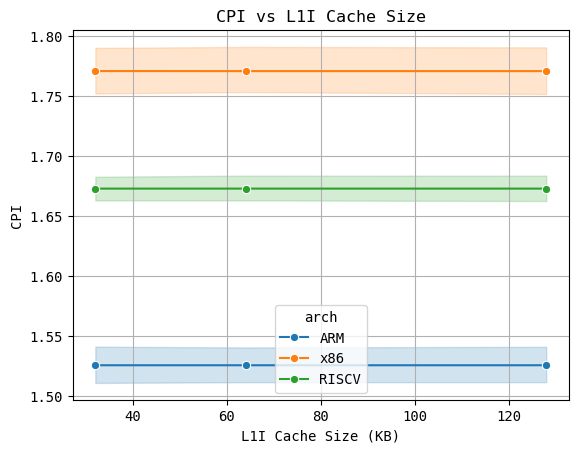

In [55]:
sns.lineplot(data=cache_enabled_df, x="l1i", y="core.cpi", hue="arch", marker="o")
plt.title("CPI vs L1I Cache Size")
plt.xlabel("L1I Cache Size (KB)")
plt.ylabel("CPI")
plt.grid(True)
plt.show()


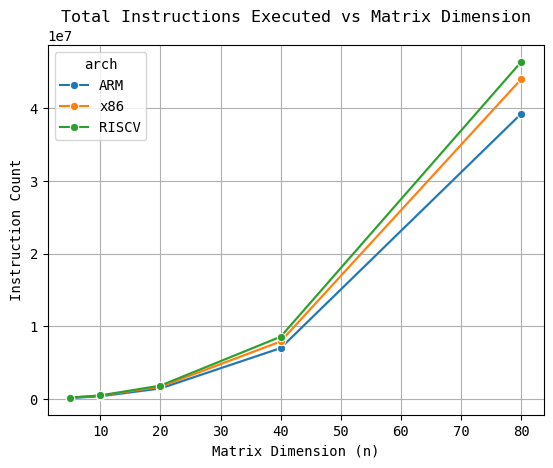

In [56]:
sns.lineplot(data=cache_enabled_df, x="dim", y="simInsts", hue="arch", marker="o")
plt.title("Total Instructions Executed vs Matrix Dimension")
plt.xlabel("Matrix Dimension (n)")
plt.ylabel("Instruction Count")
plt.grid(True)
plt.show()


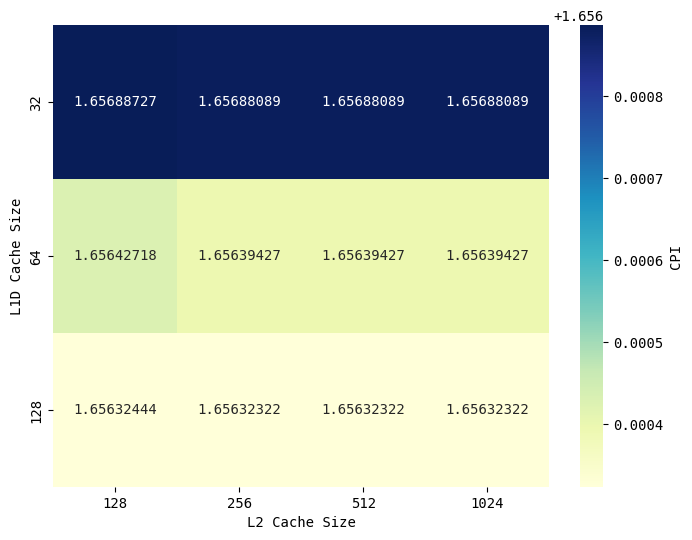

In [71]:
pivot = cache_enabled_df.pivot_table(index="l1d", columns="l2", values="core.cpi", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".8f", cmap="YlGnBu", cbar_kws={'label': 'CPI'})
plt.xlabel("L2 Cache Size")
plt.ylabel("L1D Cache Size")
plt.show()


/tmp/ipykernel_1869527/1460347844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache_enabled_df["l1d"] = pd.to_numeric(cache_enabled_df["l1d"])
/tmp/ipykernel_1869527/1460347844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache_enabled_df["l2"] = pd.to_numeric(cache_enabled_df["l2"])
/tmp/ipykernel_1869527/1460347844.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

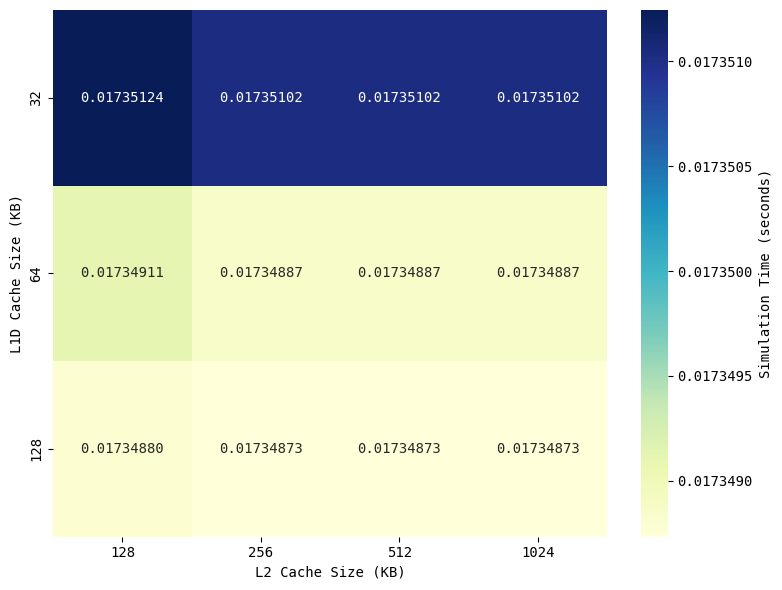

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure 'l1d', 'l2', and 'simSeconds' are numeric
cache_enabled_df["l1d"] = pd.to_numeric(cache_enabled_df["l1d"])
cache_enabled_df["l2"] = pd.to_numeric(cache_enabled_df["l2"])
cache_enabled_df["simSeconds"] = pd.to_numeric(cache_enabled_df["simSeconds"])

# Create pivot table for heatmap
heatmap_data = cache_enabled_df.pivot_table(
    index="l1d",
    columns="l2",
    values="simSeconds",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".8f", cmap="YlGnBu", cbar_kws={'label': 'Simulation Time (seconds)'})
plt.xlabel("L2 Cache Size (KB)")
plt.ylabel("L1D Cache Size (KB)")
plt.tight_layout()
plt.show()


# Actual Start Here

/tmp/ipykernel_1869527/4200196233.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cache_enabled_df, x="arch", y="simSeconds", ci=None)


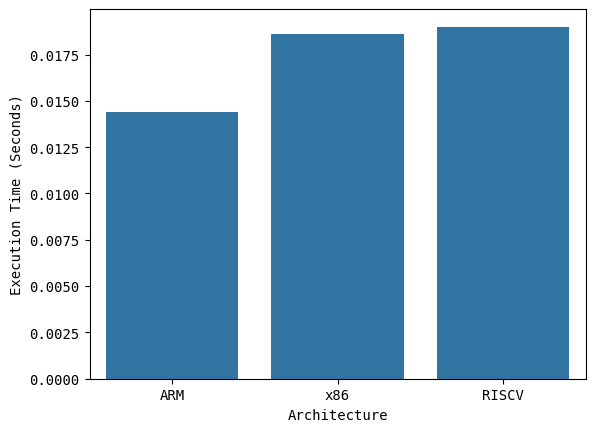

/tmp/ipykernel_1869527/4200196233.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cache_enabled_df, x="arch", y="l1d_miss_rate", ci=None)


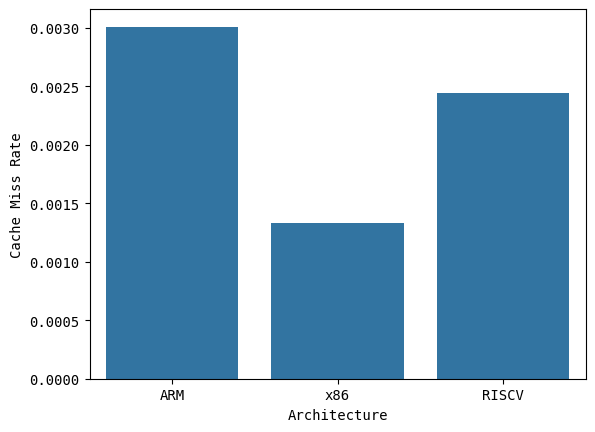

In [59]:
# Execution Speed (simSeconds) by Architecture
sns.barplot(data=cache_enabled_df, x="arch", y="simSeconds", ci=None)
plt.ylabel("Execution Time (Seconds)")
plt.xlabel("Architecture")
plt.show()

# Cache Miss Rate (CMR) by Architecture
sns.barplot(data=cache_enabled_df, x="arch", y="l1d_miss_rate", ci=None)
plt.ylabel("Cache Miss Rate")
plt.xlabel("Architecture")
plt.show()

/tmp/ipykernel_1869527/3594233319.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cache_enabled_df, x="arch", y="l1d_miss_rate", ci=None)


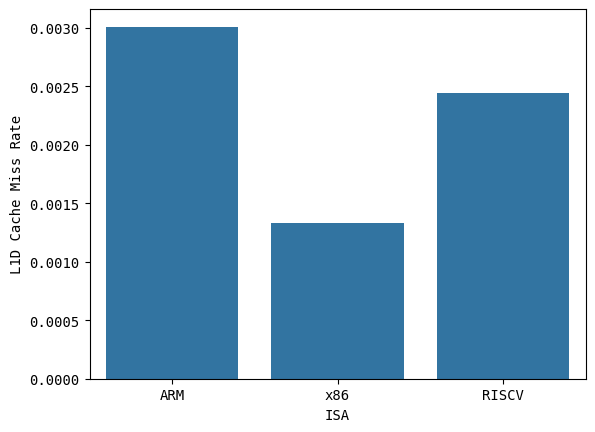

/tmp/ipykernel_1869527/3594233319.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cache_enabled_df, x="arch", y="l1i_miss_rate", ci=None)


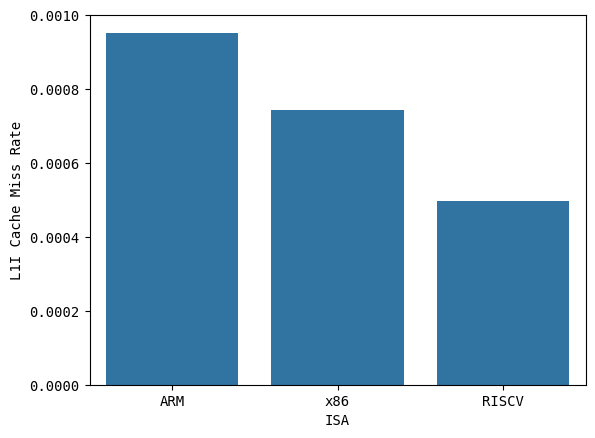

/tmp/ipykernel_1869527/3594233319.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cache_enabled_df, x="arch", y="l2_miss_rate", ci=None)


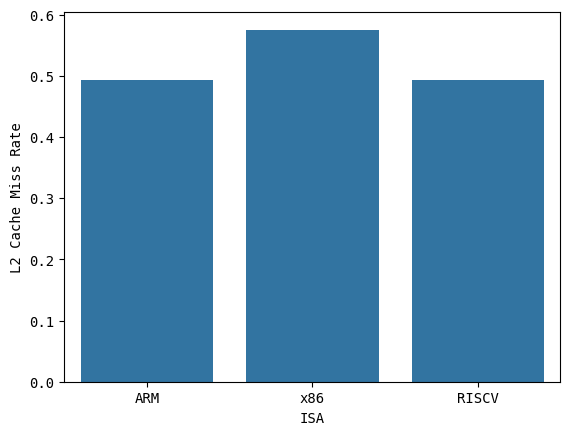

In [62]:
# Plot L1D Cache Miss Rate by ISA
sns.barplot(data=cache_enabled_df, x="arch", y="l1d_miss_rate", ci=None)
plt.ylabel("L1D Cache Miss Rate")
plt.xlabel("ISA")
plt.show()

# Plot L1I Cache Miss Rate by ISA
sns.barplot(data=cache_enabled_df, x="arch", y="l1i_miss_rate", ci=None)
plt.ylabel("L1I Cache Miss Rate")
plt.xlabel("ISA")
plt.show()

# Plot L2 Cache Miss Rate by ISA
sns.barplot(data=cache_enabled_df, x="arch", y="l2_miss_rate", ci=None)
plt.ylabel("L2 Cache Miss Rate")
plt.xlabel("ISA")
plt.show()